# 1. Introduction

# 2. Import Libariries and Data

In [1]:
! pip install beautifulsoup4
! pip install lxml
from bs4 import BeautifulSoup
import requests
import lxml


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# import json # library to handle JSON files

! pip install geopy  #uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium  # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 102kB 9.3MB/s ta 0:00:011
Libraries imported.


## Load Data

In [4]:
# The code was removed by Watson Studio for sharing.

,Id,offer_date,Area,Price,latitude,longitude,build_year,building_floors_num,rooms_num,City,subdistrict,market,Building_material,Building_ownership,Building_type,Construction_status,floor_no,Heating,Windows_type,Equipment_types_dishwasher,Equipment_types_fridge,Equipment_types_furniture,Equipment_types_oven,Equipment_types_stove,Equipment_types_tv,Equipment_types_washing_machine,Extras_types_air_conditioning,Extras_types_attic,Extras_types_balcony,Extras_types_basement,Extras_types_garage,Extras_types_garden,Extras_types_lift,Extras_types_separate_kitchen,Extras_types_terrace,Extras_types_two_storey,Extras_types_usable_room,Media_types_cable-television,Media_types_cable_television,Media_types_electricity,Media_types_internet,Media_types_phone,Media_types_sewage,Media_types_water,Security_types_alarm,Security_types_anti_burglary_door,Security_types_closed_area,Security_types_entryphone,Security_types_monitoring,Security_types_roller_shutters,floor_num,district_old,district,unit_price,lon_mod,lat_mod,index,grid_price,sample_size,geo_Id,distance_transit_8AM,time_transit_8AM,distance_driving_8AM,time_driving_8AM,distance_return_transit_5PM,time_return_transit_5PM,distance_return_driving_5PM,time_return_driving_5PM,price_decrease_from_20k,price_decrease_per_10min,restaurant_price_level,restaurant_mean_rating,restaurant_mean_popularity,restaurant_count,restaurant_ratings_count
0,54693264,2020-07-07,59.31,414576,52.344113,20.944478,2020,3,3,warszawa,Tarchomin,primary,silikat,full_ownership,block,to_completion,floor_1,boiler_room,plastic,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,Bialoleka,Bialoleka,6989,20.94,52.345,806,7784.367347,147,534,18.474,49.933333,18.386,23.2,18.254,48.183333,15.96,25.65,12215.632653,2446.388382,1.75,4.325,233.8,10,2338
1,60139185,2020-07-07,80.00,618000,52.343998,20.944001,1998,4,3,warszawa,Tarchomin,secondary,cellular_concrete,not_specified,block,ready_to_use,floor_4,urban,not_specified,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,Bialoleka,Bialoleka,7725,20.94,52.345,806,7784.367347,147,534,18.474,49.933333,18.386,23.2,18.254,48.183333,15.96,25.65,12215.632653,2446.388382,1.75,4.325,233.8,10,2338
2,60654016,2020-07-07,65.12,620000,52.345895,20.943476,2012,4,3,warszawa,Białołęka,secondary,other,full_ownership,not_specified,not_specified,floor_1,urban,plastic,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,Bialoleka,Bialoleka,9520,20.94,52.345,806,7784.367347,147,534,18.474,49.933333,18.386,23.2,18.254,48.183333,15.96,25.65,12215.632653,2446.388382,1.75,4.325,233.8,10,2338
3,60647324,2020-07-07,102.56,614334,52.342630,20.942790,2020,3,4,warszawa,Nowodwory,primary,not_specified,not_specified,not_specified,not_specified,floor_3,not_specified,not_specified,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Bialoleka,Bialoleka,5989,20.94,52.345,806,7784.367347,147,534,18.474,49.933333,18.386,23.2,18.254,48.183333,15.96,25.65,12215.632653,2446.388382,1.75,4.325,233.8,10,2338
4,59470914,2020-07-07,52.00,398000,52.344822,20.941277,2021,5,3,warszawa,Tarchomin,primary,brick,not_specified,block,to_completion,floor_1,not_specified,not_specified,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Bialoleka,Bialoleka,7653,20.94,52.345,806,7784.367347,147,534,18.474,49.933333,18.386,23.2,18.254,48.183333,15.96,25.65,12215.632653,2446.388382,1.75,4.325,233.8,10,2338


In [5]:
df_RE = df_data_0
df_RE.columns

Index(['Id', 'offer_date', 'Area', 'Price', 'latitude', 'longitude',
       'build_year', 'building_floors_num', 'rooms_num', 'City', 'subdistrict',
       'market', 'Building_material', 'Building_ownership', 'Building_type',
       'Construction_status', 'floor_no', 'Heating', 'Windows_type',
       'Equipment_types_dishwasher', 'Equipment_types_fridge',
       'Equipment_types_furniture', 'Equipment_types_oven',
       'Equipment_types_stove', 'Equipment_types_tv',
       'Equipment_types_washing_machine', 'Extras_types_air_conditioning',
       'Extras_types_attic', 'Extras_types_balcony', 'Extras_types_basement',
       'Extras_types_garage', 'Extras_types_garden', 'Extras_types_lift',
       'Extras_types_separate_kitchen', 'Extras_types_terrace',
       'Extras_types_two_storey', 'Extras_types_usable_room',
       'Media_types_cable-television', 'Media_types_cable_television',
       'Media_types_electricity', 'Media_types_internet', 'Media_types_phone',
       'Media_types_sewag

In [6]:
df_project = df_RE[['subdistrict','district']]
df_project = df_project.drop_duplicates(subset='subdistrict',keep = "first")
df_project.drop(332)

,subdistrict,district
0,Tarchomin,Bialoleka
2,Białołęka,Bialoleka
3,Nowodwory,Bialoleka
48,Dąbrówka Szlachecka,Bialoleka
147,Stara Praga,Praga
148,Praga-Północ,Praga
175,Kabaty,Ursynow
182,Natolin,Ursynow
185,Ursynów,Ursynow
204,Mokotów,Mokotow


In [7]:
df_project.replace('Pola Mokotowskie', 'Pole Mokotowskie')
df_project

,subdistrict,district
0,Tarchomin,Bialoleka
2,Białołęka,Bialoleka
3,Nowodwory,Bialoleka
48,Dąbrówka Szlachecka,Bialoleka
147,Stara Praga,Praga
148,Praga-Północ,Praga
175,Kabaty,Ursynow
182,Natolin,Ursynow
185,Ursynów,Ursynow
204,Mokotów,Mokotow


In [8]:
df_project.reset_index(drop=True, inplace=True)
df_project

,subdistrict,district
0,Tarchomin,Bialoleka
1,Białołęka,Bialoleka
2,Nowodwory,Bialoleka
3,Dąbrówka Szlachecka,Bialoleka
4,Stara Praga,Praga
5,Praga-Północ,Praga
6,Kabaty,Ursynow
7,Natolin,Ursynow
8,Ursynów,Ursynow
9,Mokotów,Mokotow


In [9]:
df_project.drop(18,inplace=True)
df_project.drop(28,inplace=True)
df_project.drop(54,inplace=True)

df_project

,subdistrict,district
0,Tarchomin,Bialoleka
1,Białołęka,Bialoleka
2,Nowodwory,Bialoleka
3,Dąbrówka Szlachecka,Bialoleka
4,Stara Praga,Praga
5,Praga-Północ,Praga
6,Kabaty,Ursynow
7,Natolin,Ursynow
8,Ursynów,Ursynow
9,Mokotów,Mokotow


In [10]:
df_project.loc[27,'district']= 'Śródmieście'
df_project.loc[19,'district']= 'Śródmieście'
df_project.loc[13,'district']= 'Wola'
df_project.loc[75,'district']= 'Śródmieście'
df_project.loc[75,'district']= 'Willanow'
df_project.loc[15,'district']= 'Śródmieście'

df_project.loc[20,'district']= 'Śródmieście'
df_project.loc[31,'district']= 'Bemowo'
df_project.loc[45,'district']= 'Wesoła'
df_project.loc[47,'district']= 'Ursus'
df_project.loc[51,'district']= 'Rembertow'
df_project.loc[77,'subdistrict']= 'Pole Mokotowskie'
df_project.loc[50,'district']= 'Ursynow'
df_project.loc[123,'district']= 'Ursus'
df_project.loc[111,'district']= 'Rembertow'
df_project.loc[32,'district']= 'Ursynow'
df_project.loc[36,'district']='Włochy' 
df_project.loc[52,'district']='Włochy' 
df_project.loc[56,'district']='Targowek' 
df_project.loc[95,'district']='Targowek' 
df_project.loc[53,'district']='Rembertow' 
df_project.loc[58,'district']='Wawer' 
df_project.loc[58,'district']='Wawer' 
df_project.loc[68,'district']='Wesoła' 
df_project.loc[85,'district']='Ursus' 
df_project.loc[86,'district']='Bielany' 
df_project.loc[101,'district']='Wesoła'
df_project.loc[112,'district']='Bialoleka'
df_project.loc[121,'district']='Bialoleka'
df_project.loc[122,'district']='Bialoleka'
df_project.loc[137,'district']='Wawer'
df_project.loc[41,'district']='Zoliborz'


In [11]:
df_project.reset_index(drop=True, inplace=True)
df_project

,subdistrict,district
0,Tarchomin,Bialoleka
1,Białołęka,Bialoleka
2,Nowodwory,Bialoleka
3,Dąbrówka Szlachecka,Bialoleka
4,Stara Praga,Praga
5,Praga-Północ,Praga
6,Kabaty,Ursynow
7,Natolin,Ursynow
8,Ursynów,Ursynow
9,Mokotów,Mokotow


In [12]:
df_project.loc[72,'district']='Śródmieście'
df_project.loc[73,'district']='Śródmieście'
df_project.loc[16,'district']='Wilanow'

df_project

,subdistrict,district
0,Tarchomin,Bialoleka
1,Białołęka,Bialoleka
2,Nowodwory,Bialoleka
3,Dąbrówka Szlachecka,Bialoleka
4,Stara Praga,Praga
5,Praga-Północ,Praga
6,Kabaty,Ursynow
7,Natolin,Ursynow
8,Ursynów,Ursynow
9,Mokotów,Mokotow


In [15]:
# Import the lib
from project_lib import Project
project = Project.access()
    
# let's assume you have the pandas DataFrame  pandas_df which contains the data
# you want to save as a csv file
project.save_data("districts_warsaw.csv", df_project.to_csv(index=False))

# the function returns a dict which contains the asset_id and file_name
# upon successful saving of the data



2020-08-06 07:53:14,455 - __PROJECT_LIB__ - ERROR - GET project failed, status 400 from https://api.eu-de.dataplatform.cloud.ibm.com/v2/projects/Untrusted notebook
{"code":400,"error":"Bad Request","reason":"Invalid resource guid format!","message":"The server cannot or will not process the request due to an apparent client error (e.g. malformed request syntax)."}


RuntimeError: Failed to GET project, status: 400

In [13]:
address = 'Warszawa, Poland'

geolocator = Nominatim(user_agent="waw_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Warsaw are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Warsaw are 52.2319581, 21.0067249.


## Get Geo coordinates of all subdistricts

In [14]:
lat_list = []
lng_list=[]
geolocator = Nominatim(user_agent="waw_explorer")
i=0
for subdistrict, district in zip(df_project['subdistrict'],df_project['district']):
    if district == 'Downtown':
        district=' '
    if district == 'Southern Praga':
        district=' '
    address = '{}, {}, Warsaw'.format(subdistrict,district)
    location = geolocator.geocode(address)
    lat = location.latitude
    long = location.longitude
    lat_list.append(lat)
    lng_list.append(long) 
    end = subdistrict
    i=i+1

In [14]:
end

'Stokłosy'

 ### Assign lists to DateFrame

In [15]:

df_temp = df_project.assign(Latitude = lat_list)
df_temp1 = df_temp.assign(Longitude = lng_list)
df_dist = df_temp1


In [16]:
df_dist.head()

,subdistrict,district,Latitude,Longitude
0,Tarchomin,Bialoleka,52.318028,20.954304
1,Białołęka,Bialoleka,52.318480,21.032274
2,Nowodwory,Bialoleka,52.332504,20.942352
3,Dąbrówka Szlachecka,Bialoleka,52.343136,20.960516
4,Stara Praga,Praga,52.250981,21.033605


In [17]:
df_dist = df_dist.merge(df_project,on='subdistrict', how='left')

In [18]:
address = 'Swietokrzyska, Warszawa, Poland'

geolocator = Nominatim(user_agent="waw_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Warsaw are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Warsaw are 52.2350954, 21.0078988.


In [19]:
map_warsaw = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, subdistrict in zip(df_dist['Latitude'], df_dist['Longitude'],df_dist['subdistrict']):
    label = '{}'.format(subdistrict)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_warsaw)  
    
map_warsaw

In [84]:
central_dist = df_dist['district'==]


0           Bialoleka
1           Bialoleka
2           Bialoleka
3           Bialoleka
4               Praga
5               Praga
6             Ursynow
7             Ursynow
8             Ursynow
9             Mokotow
10            Mokotow
11            Mokotow
12               Wola
13               Wola
14           Downtown
15        Śródmieście
16           Downtown
17               Wola
18        Śródmieście
19        Śródmieście
20           Downtown
21            Wilanow
22            Mokotow
23            Mokotow
24            Mokotow
25            Mokotow
26        Śródmieście
27            Mokotow
28            Mokotow
29             Bemowo
30            Ursynow
31             Ochota
32             Ochota
33             Ochota
34             Włochy
35            Bielany
36            Bielany
37            Mokotow
38            Mokotow
39           Zoliborz
40           Zoliborz
41     Southern Praga
42     Southern Praga
43             Wesoła
44     Southern Praga
45        

In [79]:
import io
from project_lib import Project

filename = "Warsaw_Neighbourhoods_05082020.xlsx"
with open(filename, 'rb') as z:
        data = io.BytesIO(z.read())
        project.save_data(
            filename, data, set_project_asset=True, overwrite=True
        )

NameError: name 'project' is not defined

In [99]:
# The code was removed by Watson Studio for sharing.

In [21]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# type your answer here
radius = 500
LIMIT = 100
warsaw_venues = getNearbyVenues(df_dist['subdistrict'],df_dist['Latitude'], df_dist['Longitude']
                                  )

Tarchomin
Białołęka
Nowodwory
Dąbrówka Szlachecka
Stara Praga
Praga-Północ
Kabaty
Natolin
Ursynów
Mokotów
Ksawerów
Górny Mokotów
Wola
Mirów
Centrum
Śródmieście
Zawady
Czyste
Śródmieście Południowe
Śródmieście Północne
Wola Grzybowska
Wilanów
Stegny
Dolny Mokotów
Służewiec
Potok
Powiśle
Służew
Sadyba
Bemowo
Wyczółki
Szczęśliwice
Ochota
Rakowiec
Okęcie
Bielany
Stare Bielany
Metro Wilanowska
Królikarnia
Stary Żoliborz
Żoliborz
Praga-Południe
Gocław
Wesoła
Saska Kępa
Ursus
Wawer
Stara Ochota
Stokłosy
Stary Rembertów
Włochy
Rembertów
Chrzanów
Bródno
Muranów
Marysin Wawerski
Gocławek
Targówek
Moczydło
Młynów
Odolany
Sady Żoliborskie
Koło
Ulrychów
Praga
Stara Miłosna
Wierzbno
Wyględów
Ruda
Marymont
Powązki
Latawiec
Stare Miasto
Nowe Miasto
Pole Mokotowskie
Słodowiec
Imielin
Stary Imielin
Witolin
Grochów
Sielce
Cytadela
Skorosze
Wrzeciono
Stare Włochy
Kamionek
Nowe Jeziorki
Nowa Praga
Powsinek
Szmulowizna
Anin
Międzylesie
Bródno-Podgrodzie
Grabów
Piaski
Wawrzyszew
Mariensztat
Filtry
Zielona
Cz

In [24]:
print(warsaw_venues.shape)
warsaw_venues.head()

(2037, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tarchomin,52.318028,20.954304,Lidl Tarchomin,52.317921,20.960830,Supermarket
1,Tarchomin,52.318028,20.954304,Piotr i Paweł,52.317330,20.951663,Grocery Store
2,Tarchomin,52.318028,20.954304,Bar Aloha,52.316933,20.950030,Bar
3,Tarchomin,52.318028,20.954304,Tarchomin,52.318818,20.953737,Neighborhood
4,Tarchomin,52.318028,20.954304,Apteka 24h,52.317959,20.951932,Pharmacy


In [30]:
warsaw_venues.groupby('Neighbourhood').count()
amt_venues = warsaw_venues.groupby('Neighbourhood').count()


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Anin,13,13,13,13,13,13
Annopol,13,13,13,13,13,13
Augustówek,1,1,1,1,1,1
Bemowo,14,14,14,14,14,14
Białołęka,4,4,4,4,4,4
Białołęka Dworska,1,1,1,1,1,1
Bielany,15,15,15,15,15,15
Borków,4,4,4,4,4,4
Bródno,10,10,10,10,10,10


In [107]:
amt_venues = amt_venues[amt_venues['Venue']>10]
list_venues = amt_venues.index
list_venues

Index(['Anin', 'Annopol', 'Bemowo', 'Bielany', 'Centrum', 'Czyste', 'Gocław',
       'Grochów', 'Górce', 'Górny Mokotów', 'Imielin', 'Kabaty', 'Kamionek',
       'Latawiec', 'Mariensztat', 'Metro Wilanowska', 'Mirów', 'Moczydło',
       'Mokotów', 'Muranów', 'Młociny', 'Młynów', 'Natolin', 'Nowe Miasto',
       'Pole Mokotowskie', 'Powiśle', 'Praga', 'Praga-Północ', 'Rakowiec',
       'Sadyba', 'Saska Kępa', 'Sielce', 'Skorosze', 'Stara Ochota',
       'Stara Praga', 'Stare Bielany', 'Stare Miasto', 'Stary Żoliborz',
       'Stokłosy', 'Szczęśliwice', 'Służew', 'Tarchomin', 'Wiktoryn',
       'Wilanów', 'Wola', 'Śródmieście', 'Śródmieście Południowe',
       'Śródmieście Północne', 'Żoliborz'],
      dtype='object', name='Neighbourhood')

In [58]:
warsaw_venues_big = warsaw_venues[warsaw_venues.Neighbourhood.isin(list_venues)]
warsaw_venues_big.head(100)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tarchomin,52.318028,20.954304,Lidl Tarchomin,52.317921,20.960830,Supermarket
1,Tarchomin,52.318028,20.954304,Piotr i Paweł,52.317330,20.951663,Grocery Store
2,Tarchomin,52.318028,20.954304,Bar Aloha,52.316933,20.950030,Bar
3,Tarchomin,52.318028,20.954304,Tarchomin,52.318818,20.953737,Neighborhood
4,Tarchomin,52.318028,20.954304,Apteka 24h,52.317959,20.951932,Pharmacy
5,Tarchomin,52.318028,20.954304,Tesco,52.317891,20.952186,Miscellaneous Shop
6,Tarchomin,52.318028,20.954304,Rossmann Tarchomin,52.318776,20.953038,Drugstore
7,Tarchomin,52.318028,20.954304,Tarchomin 01,52.318222,20.952654,Bus Station
8,Tarchomin,52.318028,20.954304,Sushi Zume,52.317280,20.951566,Japanese Restaurant
9,Tarchomin,52.318028,20.954304,Myśliborska,52.316286,20.955783,Bus Station


In [59]:
warsaw_venues = warsaw_venues_big

In [31]:
df=pd.merge(df_dist,amt_venues,left_on="subdistrict",right_on="Neighbourhood")
df.head()

,subdistrict,district_x,Latitude,Longitude,district_y,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tarchomin,Bialoleka,52.318028,20.954304,Bialoleka,12,12,12,12,12,12
1,Białołęka,Bialoleka,52.318480,21.032274,Bialoleka,4,4,4,4,4,4
2,Nowodwory,Bialoleka,52.332504,20.942352,Bialoleka,4,4,4,4,4,4
3,Dąbrówka Szlachecka,Bialoleka,52.343136,20.960516,Bialoleka,2,2,2,2,2,2
4,Stara Praga,Praga,52.250981,21.033605,Praga,36,36,36,36,36,36


In [60]:
warsaw_venues

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Tarchomin,52.318028,20.954304,Lidl Tarchomin,52.317921,20.960830,Supermarket
1,Tarchomin,52.318028,20.954304,Piotr i Paweł,52.317330,20.951663,Grocery Store
2,Tarchomin,52.318028,20.954304,Bar Aloha,52.316933,20.950030,Bar
3,Tarchomin,52.318028,20.954304,Tarchomin,52.318818,20.953737,Neighborhood
4,Tarchomin,52.318028,20.954304,Apteka 24h,52.317959,20.951932,Pharmacy
5,Tarchomin,52.318028,20.954304,Tesco,52.317891,20.952186,Miscellaneous Shop
6,Tarchomin,52.318028,20.954304,Rossmann Tarchomin,52.318776,20.953038,Drugstore
7,Tarchomin,52.318028,20.954304,Tarchomin 01,52.318222,20.952654,Bus Station
8,Tarchomin,52.318028,20.954304,Sushi Zume,52.317280,20.951566,Japanese Restaurant
9,Tarchomin,52.318028,20.954304,Myśliborska,52.316286,20.955783,Bus Station


In [61]:
print('There are {} uniques categories.'.format(len(warsaw_venues['Venue Category'].unique())))

There are 223 uniques categories.


In [62]:
# one hot encoding
warsaw_onehot = pd.get_dummies(warsaw_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
warsaw_onehot['Neighbourhood'] = warsaw_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [warsaw_onehot.columns[-1]] + list(warsaw_onehot.columns[:-1])
warsaw_onehot = warsaw_onehot[fixed_columns]

warsaw_onehot.head()

,Neighbourhood,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,Baby Store,Bakery,Bank,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Butcher,Café,Castle,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Stadium,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Government Building,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Outlet Mall,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tiki Bar,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Tarchomin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Tarchomin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [63]:
warsaw_onehot.shape

(1602, 224)

In [64]:
warsaw_grouped = warsaw_onehot.groupby('Neighbourhood').mean().reset_index()
warsaw_grouped

,Neighbourhood,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,Baby Store,Bakery,Bank,Bar,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Butcher,Café,Castle,Caucasian Restaurant,Chinese Restaurant,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Stadium,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cultural Center,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Government Building,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Outlet Mall,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Restaurant,River,Road,Rock Climbing Spot,Rock Club,Russian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tiki Bar,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Anin,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.000000,0.076923,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.076923,0.076

In [65]:
warsaw_grouped.shape

(49, 224)

In [66]:
num_top_venues = 5

for hood in warsaw_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = warsaw_grouped[warsaw_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anin----
                         venue  freq
0                  Bus Station  0.23
1                         Pool  0.08
2  Eastern European Restaurant  0.08
3    Middle Eastern Restaurant  0.08
4                         Park  0.08


----Annopol----
                venue  freq
0      Clothing Store  0.31
1         Coffee Shop  0.15
2  Rock Climbing Spot  0.08
3         Outlet Mall  0.08
4        Tram Station  0.08


----Bemowo----
                 venue  freq
0    Food & Drink Shop  0.14
1   Italian Restaurant  0.07
2  Japanese Restaurant  0.07
3       Ice Cream Shop  0.07
4           Donut Shop  0.07


----Bielany----
           venue  freq
0  Grocery Store  0.20
1    Coffee Shop  0.13
2           Café  0.13
3           Park  0.07
4  Train Station  0.07


----Centrum----
                 venue  freq
0          Coffee Shop  0.11
1                 Café  0.07
2             Beer Bar  0.05
3              Theater  0.05
4  American Restaurant  0.04


----Czyste----
                 venue 

In [67]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [68]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = warsaw_grouped['Neighbourhood']

for ind in np.arange(warsaw_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(warsaw_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anin,Bus Station,Eastern European Restaurant,Park,Forest,Café,Middle Eastern Restaurant,Grocery Store,Gym,Skating Rink,Asian Restaurant
1,Annopol,Clothing Store,Coffee Shop,Rock Climbing Spot,Tunnel,Sporting Goods Shop,Tram Station,Outlet Mall,Chocolate Shop,Café,Exhibit
2,Bemowo,Food & Drink Shop,Bus Station,Japanese Restaurant,Sandwich Place,Coffee Shop,Café,Supermarket,Donut Shop,Italian Restaurant,Cosmetics Shop
3,Bielany,Grocery Store,Coffee Shop,Café,Drugstore,Fast Food Restaurant,Train Station,Bookstore,College Stadium,Park,Cosmetics Shop
4,Centrum,Coffee Shop,Café,Beer Bar,Theater,American Restaurant,Hotel Bar,Cosmetics Shop,Polish Restaurant,Lounge,Cocktail Bar


## 4. Cluster Neighborhoods

In [122]:
# set number of clusters
kclusters = 7

warsaw_grouped_clustering = warsaw_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(warsaw_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([3, 5, 6, 4, 1, 6, 3, 6, 6, 2, 1, 6, 1, 2, 1, 6, 2, 0, 6, 6, 6, 0,
       2, 1, 2, 1, 1, 1, 6, 3, 6, 0, 6, 1, 2, 4, 1, 6, 6, 6, 1, 0, 3, 3,
       2, 2, 2, 2, 6], dtype=int32)

In [132]:
# add clustering labels
neighbourhoods_venues_sorted.drop(columns='Cluster Labels',inplace=True)

neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [133]:

warsaw_merged = df_dist

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
warsaw_merged=pd.merge(warsaw_merged,neighbourhoods_venues_sorted,left_on="subdistrict",right_on="Neighbourhood")

warsaw_merged.head() # check the last columns!

,subdistrict,district_x,Latitude,Longitude,district_y,Cluster Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Tarchomin,Bialoleka,52.318028,20.954304,Bialoleka,0,Tarchomin,Bus Station,Japanese Restaurant,Bar,Food & Drink Shop,Pharmacy,Neighborhood,Miscellaneous Shop,Supermarket,Drugstore,Grocery Store
1,Stara Praga,Praga,52.250981,21.033605,Praga,2,Stara Praga,Hotel,Restaurant,Coffee Shop,Fast Food Restaurant,Zoo Exhibit,Park,Shopping Mall,Bus Line,Sculpture Garden,Café
2,Praga-Północ,Praga,52.258028,21.022510,Praga,1,Praga-Północ,Zoo Exhibit,Beach,Zoo,General Entertainment,Market,Nature Preserve,Other Nightlife,Drugstore,Pizza Place,Dance Studio
3,Kabaty,Ursynow,52.132076,21.065071,Ursynow,6,Kabaty,Café,Burger Joint,Pizza Place,Sushi Restaurant,Italian Restaurant,Park,Breakfast Spot,Sporting Goods Shop,Mediterranean Restaurant,Chinese Restaurant
4,Natolin,Ursynow,52.141101,21.056435,Ursynow,2,Natolin,Grocery Store,Café,Restaurant,Sushi Restaurant,Indian Restaurant,Park,Hobby Shop,Pharmacy,Coffee Shop,Cupcake Shop


In [134]:
warsaw_merged.drop(columns=['district_y'],inplace=True)


In [135]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_clusters

In [136]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(warsaw_merged['Latitude'], warsaw_merged['Longitude'], warsaw_merged['Neighbourhood'], warsaw_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

In [137]:
warsaw_merged.loc[warsaw_merged['Cluster Labels'] == 0, warsaw_merged.columns[[1] + list(range(5, warsaw_merged.shape[1]))]]

,district_x,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bialoleka,Tarchomin,Bus Station,Japanese Restaurant,Bar,Food & Drink Shop,Pharmacy,Neighborhood,Miscellaneous Shop,Supermarket,Drugstore,Grocery Store
31,Wola,Moczydło,Bus Station,Pizza Place,Gym / Fitness Center,Gastropub,Café,Sushi Restaurant,Grocery Store,Theme Park Ride / Attraction,Rock Club,Park
32,Wola,Młynów,Soccer Field,Train Station,Motorcycle Shop,Café,Chinese Restaurant,Rock Club,Gastropub,Music Store,Flea Market,Falafel Restaurant
40,Mokotow,Sielce,Grocery Store,Bus Station,Italian Restaurant,Café,Supermarket,Chinese Restaurant,Fast Food Restaurant,Bike Shop,Event Space,Restaurant


In [138]:
warsaw_merged.loc[warsaw_merged['Cluster Labels'] == 1, warsaw_merged.columns[[1] + list(range(5, warsaw_merged.shape[1]))]]

,district_x,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Praga,Praga-Północ,Zoo Exhibit,Beach,Zoo,General Entertainment,Market,Nature Preserve,Other Nightlife,Drugstore,Pizza Place,Dance Studio
9,Downtown,Centrum,Coffee Shop,Café,Beer Bar,Theater,American Restaurant,Hotel Bar,Cosmetics Shop,Polish Restaurant,Lounge,Cocktail Bar
15,Śródmieście,Powiśle,Pizza Place,Café,Italian Restaurant,Asian Restaurant,Restaurant,Pub,Polish Restaurant,Bar,Park,Science Museum
16,Mokotow,Służew,Pub,Cultural Center,Japanese Restaurant,Bus Stop,Fast Food Restaurant,Thai Restaurant,Gym,Turkish Restaurant,Dumpling Restaurant,Discount Store
28,Ochota,Stara Ochota,Pizza Place,Bakery,Polish Restaurant,Café,Sporting Goods Shop,Gas Station,Theater,Bar,Tram Station,Turkish Restaurant
33,Praga,Praga,Bar,Café,Polish Restaurant,Nightclub,Platform,Historic Site,Bus Stop,Russian Restaurant,Restaurant,Coffee Shop
35,Śródmieście,Stare Miasto,Café,Plaza,Eastern European Restaurant,Dumpling Restaurant,Pub,Polish Restaurant,Italian Restaurant,Restaurant,Coffee Shop,Beer Bar
36,Śródmieście,Nowe Miasto,Café,Plaza,Dumpling Restaurant,Italian Restaurant,Polish Restaurant,Eastern European Restaurant,Beer Bar,Beer Garden,Theater,Coffee Shop
38,Ursynow,Imielin,Sushi Restaurant,Eastern European Restaurant,Gym / Fitness Center,American Restaurant,Bar,Market,Bistro,Lounge,Multiplex,Kebab Restaurant
42,Southern Praga,Kamionek,Italian Restaurant,Light Rail Station,Café,Middle Eastern Restaurant,Chocolate Shop,Mexican Restaurant,Coffee Shop,Lake,Bistro,Theater


In [139]:
warsaw_merged.loc[warsaw_merged['Cluster Labels'] == 2, warsaw_merged.columns[[1] + list(range(5, warsaw_merged.shape[1]))]]

,district_x,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Praga,Stara Praga,Hotel,Restaurant,Coffee Shop,Fast Food Restaurant,Zoo Exhibit,Park,Shopping Mall,Bus Line,Sculpture Garden,Café
4,Ursynow,Natolin,Grocery Store,Café,Restaurant,Sushi Restaurant,Indian Restaurant,Park,Hobby Shop,Pharmacy,Coffee Shop,Cupcake Shop
6,Mokotow,Górny Mokotów,Spa,Café,Middle Eastern Restaurant,Bakery,Modern European Restaurant,Bus Stop,Chinese Restaurant,Sushi Restaurant,Restaurant,Eastern European Restaurant
7,Wola,Wola,Restaurant,Coffee Shop,Hotel,Café,Chinese Restaurant,American Restaurant,Plaza,Sporting Goods Shop,Burger Joint,Bus Station
8,Wola,Mirów,Dance Studio,Café,Hotel,Restaurant,Coffee Shop,Polish Restaurant,Italian Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant
10,Śródmieście,Śródmieście,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Cocktail Bar,Hotel,Polish Restaurant,Sushi Restaurant,Hostel,Ice Cream Shop,Modern European Restaurant
12,Śródmieście,Śródmieście Południowe,Café,Vegetarian / Vegan Restaurant,Cocktail Bar,Coffee Shop,Sushi Restaurant,Italian Restaurant,Restaurant,Bistro,Hostel,Bar
13,Śródmieście,Śródmieście Północne,Coffee Shop,Café,Nightclub,Restaurant,Cocktail Bar,Hotel,Fast Food Restaurant,Plaza,Pizza Place,Park
34,Downtown,Latawiec,Café,Vegetarian / Vegan Restaurant,Restaurant,Plaza,Theater,Coffee Shop,Park,Sandwich Place,Eastern European Restaurant,Board Shop
37,Mokotow,Pole Mokotowskie,Café,Bar,Restaurant,Bakery,Coffee Shop,Science Museum,Movie Theater,Sporting Goods Shop,Chinese Restaurant,Supermarket


In [140]:
warsaw_merged.loc[warsaw_merged['Cluster Labels'] == 3, warsaw_merged.columns[[1] + list(range(5, warsaw_merged.shape[1]))]]

,district_x,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Wilanow,Wilanów,Italian Restaurant,Bus Station,Historic Site,Burger Joint,Garden,Fast Food Restaurant,Sporting Goods Shop,Steakhouse,Breakfast Spot,Public Art
17,Mokotow,Sadyba,Bus Station,Park,Coffee Shop,Electronics Store,Bookstore,Clothing Store,Multiplex,Dessert Shop,Sandwich Place,Salad Place
26,Southern Praga,Gocław,Bus Station,Sushi Restaurant,Supermarket,Food & Drink Shop,Gift Shop,Gastropub,Sporting Goods Shop,Chinese Restaurant,Trail,Kebab Restaurant
43,Wawer,Anin,Bus Station,Eastern European Restaurant,Park,Forest,Café,Middle Eastern Restaurant,Grocery Store,Gym,Skating Rink,Asian Restaurant
45,Wlochy,Wiktoryn,Italian Restaurant,Furniture / Home Store,Convenience Store,Fast Food Restaurant,Nightclub,Bus Station,Department Store,Hardware Store,Platform,Asian Restaurant


In [141]:
warsaw_merged.loc[warsaw_merged['Cluster Labels'] == 4, warsaw_merged.columns[[1] + list(range(5, warsaw_merged.shape[1]))]]

,district_x,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Bielany,Bielany,Grocery Store,Coffee Shop,Café,Drugstore,Fast Food Restaurant,Train Station,Bookstore,College Stadium,Park,Cosmetics Shop
22,Bielany,Stare Bielany,Grocery Store,Coffee Shop,Café,Drugstore,Fast Food Restaurant,Train Station,Bookstore,College Stadium,Park,Cosmetics Shop


In [142]:
warsaw_merged.loc[warsaw_merged['Cluster Labels'] == 5, warsaw_merged.columns[[1] + list(range(5, warsaw_merged.shape[1]))]]

,district_x,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Bialoleka,Annopol,Clothing Store,Coffee Shop,Rock Climbing Spot,Tunnel,Sporting Goods Shop,Tram Station,Outlet Mall,Chocolate Shop,Café,Exhibit


In [143]:
warsaw_merged.loc[warsaw_merged['Cluster Labels'] == 6, warsaw_merged.columns[[1] + list(range(5, warsaw_merged.shape[1]))]]

,district_x,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Ursynow,Kabaty,Café,Burger Joint,Pizza Place,Sushi Restaurant,Italian Restaurant,Park,Breakfast Spot,Sporting Goods Shop,Mediterranean Restaurant,Chinese Restaurant
5,Mokotow,Mokotów,Café,Burger Joint,Italian Restaurant,Kebab Restaurant,Playground,Dance Studio,Farmers Market,Bus Stop,Modern European Restaurant,Bistro
11,Wola,Czyste,Japanese Restaurant,Pizza Place,Burger Joint,Volleyball Court,Sushi Restaurant,Italian Restaurant,Theater,Gym / Fitness Center,Asian Restaurant,Pool
18,Bemowo,Bemowo,Food & Drink Shop,Bus Station,Japanese Restaurant,Sandwich Place,Coffee Shop,Café,Supermarket,Donut Shop,Italian Restaurant,Cosmetics Shop
19,Ochota,Szczęśliwice,Fast Food Restaurant,Coffee Shop,Clothing Store,Electronics Store,Furniture / Home Store,Chinese Restaurant,Supermarket,Gym / Fitness Center,Bookstore,Sandwich Place
20,Ochota,Rakowiec,Park,Coffee Shop,Café,Farmers Market,Drugstore,Sushi Restaurant,Grocery Store,Gym / Fitness Center,Udon Restaurant,Convenience Store
23,Mokotow,Metro Wilanowska,Butcher,Grocery Store,Coffee Shop,Metro Station,Food & Drink Shop,Middle Eastern Restaurant,Convenience Store,Cosmetics Shop,Trail,Bar
24,Zoliborz,Stary Żoliborz,Italian Restaurant,Plaza,Café,Bookstore,Coffee Shop,Dessert Shop,Public Art,Polish Restaurant,Convenience Store,Sushi Restaurant
25,Zoliborz,Żoliborz,Plaza,Italian Restaurant,Bookstore,Playground,Kebab Restaurant,Park,Coffee Shop,Café,Bus Stop,Bus Station
27,Southern Praga,Saska Kępa,Café,Ice Cream Shop,Italian Restaurant,Pizza Place,Restaurant,Mexican Restaurant,Dessert Shop,Farmers Market,Polish Restaurant,Dim Sum Restaurant


Cluster in 5 clusters, two of contain only one neighboorhood and the biggest part of them are part of the second cluster, does not make much sense. Therefore, 

In [81]:
df_RE['unit value']=df_RE['Price']/df_RE['Area']


In [82]:
columns_RE = ['district','subdistrict','unit value']
df_value = df_RE[columns_RE]
df_value.head()

,district,subdistrict,unit value
0,Bialoleka,Tarchomin,6989.984825
1,Bialoleka,Tarchomin,7725.000000
2,Bialoleka,Białołęka,9520.884521
3,Bialoleka,Nowodwory,5989.996100
4,Bialoleka,Tarchomin,7653.846154


In [84]:
df_value = df_value[df_value.subdistrict.isin(list_venues)]
df_value.head()

,district,subdistrict,unit value
0,Bialoleka,Tarchomin,6989.984825
1,Bialoleka,Tarchomin,7725.000000
4,Bialoleka,Tarchomin,7653.846154
7,Bialoleka,Tarchomin,7750.000000
9,Bialoleka,Tarchomin,7603.773585


In [93]:
df_value.reset_index(drop=True,inplace=True)
df_value.drop(columns='index',inplace=True)
df_value.drop(columns='level_0',inplace=True)
df_value.head()

,district,subdistrict,unit value
0,Bialoleka,Tarchomin,6989.984825
1,Bialoleka,Tarchomin,7725.000000
2,Bialoleka,Tarchomin,7653.846154
3,Bialoleka,Tarchomin,7750.000000
4,Bialoleka,Tarchomin,7603.773585


In [97]:
df_avg_value = df_value.groupby('subdistrict').mean()

In [111]:
df_avg_value.reset_index(inplace=True)

In [109]:
amt_venues=amt_venues[['Venue']]
amt_venues.head()

,Venue
Neighbourhood,
Anin,13
Annopol,13
Bemowo,14
Bielany,15
Centrum,73


In [112]:
df_avg_value=pd.merge(df_avg_value,amt_venues,left_on="subdistrict",right_on="Neighbourhood")


In [113]:
df_avg_value

,subdistrict,unit value,Venue
0,Anin,8240.496912,13
1,Annopol,7768.660673,13
2,Bemowo,9765.116364,14
3,Bielany,10574.481915,15
4,Centrum,18036.053024,73
5,Czyste,13090.608698,12
6,Gocław,9699.678962,23
7,Grochów,10110.280663,23
8,Górce,10042.527450,11
9,Górny Mokotów,13326.070128,18


ValueError: Using arbitrary long args with data is not supported due to ambiguity of arguments.
Use multiple plotting calls instead.

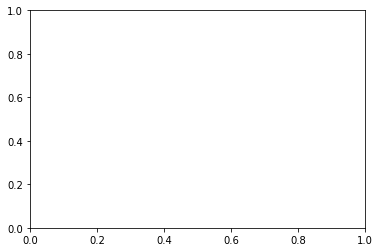

In [118]:
import matplotlib.pyplot as plt
plt.plot(kind='scatter',data=df_avg_value,x='Venue',y='unit value')